now = 2021-11-21 04:26:11.777836
*** Done by Dismal at  2021-11-21 04:26:11.777836 <class 'datetime.datetime'>


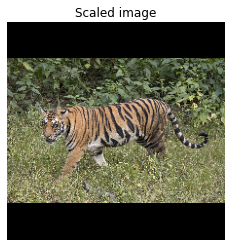

*** Done by Dismal at  2021-11-21 04:26:11.777836 <class 'datetime.datetime'>
*** Done by Dismal at  2021-11-21 04:26:11.777836 <class 'datetime.datetime'>
*** Done by Dismal at  2021-11-21 04:26:11.777836 <class 'datetime.datetime'>


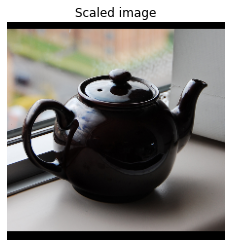

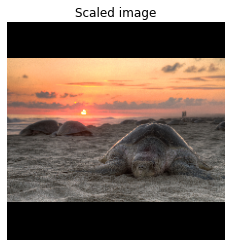

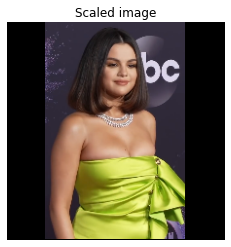

In [8]:
# 801
import tensorflow as tf
import tensorflow_hub as hub

import requests
from PIL import Image
from io import BytesIO

import matplotlib.pyplot as plt
import numpy as np

from datetime import datetime
now = datetime.now()
print("now =", now)
today = now
image_size = 224
dynamic_size = False
max_dynamic_size = 512

ts3 = 'Dismal' # Please input your English name

# 802
original_image_cache = {}

def preprocess_image(image):
  image = np.array(image)
  # reshape into shape [batch_size, height, width, num_channels]
  img_reshaped = tf.reshape(image, [1, image.shape[0], image.shape[1], image.shape[2]])
  # Use `convert_image_dtype` to convert to floats in the [0,1] range.
  image = tf.image.convert_image_dtype(img_reshaped, tf.float32)
  return image

def load_image_from_url(url):
  """Returns an image with shape [1, height, width, num_channels]."""
  user_agent = {'User-agent': 'Colab Sample (https://tensorflow.org)'}
  response = requests.get(img_url, headers=user_agent)
  image = Image.open(BytesIO(response.content))
  image = preprocess_image(image)
  return image

def load_image(image_url, image_size=256, dynamic_size=False, max_dynamic_size=512):
  """Loads and preprocesses images."""
  # Cache image file locally.
  if image_url in original_image_cache:
    img = original_image_cache[image_url]
  elif image_url.startswith('https://'):
    img = load_image_from_url(image_url)
  else:
    fd = tf.io.gfile.GFile(image_url, 'rb')
    img = preprocess_image(Image.open(fd))
  original_image_cache[image_url] = img
  # Load and convert to float32 numpy array, add batch dimension, and normalize to range [0, 1].
  img_raw = img
  if tf.reduce_max(img) > 1.0:
    img = img / 255.
  if len(img.shape) == 3:
    img = tf.stack([img, img, img], axis=-1)
  if not dynamic_size:
    img = tf.image.resize_with_pad(img, image_size, image_size)
  elif img.shape[1] > max_dynamic_size or img.shape[2] > max_dynamic_size:
    img = tf.image.resize_with_pad(img, max_dynamic_size, max_dynamic_size)
  return img, img_raw

def show_image(image, title=''):
  image_size = image.shape[1]
  w = (image_size * 6) // 320
  plt.figure(figsize=(w, w))
  plt.imshow(image[0], aspect='equal')
  plt.axis('off')
  plt.title(title)
  plt.show()

"""## 2. 選擇圖像 
您可以選擇以下圖像之一，或使用您自己的圖像。 請記住，模型的輸入大小各不相同，其中一些使用動態輸入大小（啟用對未縮放圖像的推斷）。 鑑於此，方法 load_image 已經將圖像重新縮放為預期格式。

選項: ['老虎'，'公共汽車'，'汽車'，'貓'，'狗'，'蘋果'，'烏龜'，'火烈鳥'，'鋼琴'，'蜂窩'，'茶壺']

param ['tiger', 'bus', 'car', 'cat', 'dog', 'apple', 'turtle', 'flamingo', 'piano', 'honeycomb', 'teapot']
"""

print('*** Done by %s at ' % ts3,today, type(today))
## Demo: Show tiger

image_name = 'tiger' 

images_for_test_map = {
    "tiger": "https://upload.wikimedia.org/wikipedia/commons/b/b0/Bengal_tiger_%28Panthera_tigris_tigris%29_female_3_crop.jpg",
    "bus": "https://upload.wikimedia.org/wikipedia/commons/6/63/LT_471_%28LTZ_1471%29_Arriva_London_New_Routemaster_%2819522859218%29.jpg",
    "car": "https://upload.wikimedia.org/wikipedia/commons/4/49/2013-2016_Toyota_Corolla_%28ZRE172R%29_SX_sedan_%282018-09-17%29_01.jpg",
    "cat": "https://upload.wikimedia.org/wikipedia/commons/4/4d/Cat_November_2010-1a.jpg",
    "dog": "https://upload.wikimedia.org/wikipedia/commons/archive/a/a9/20090914031557%21Saluki_dog_breed.jpg",
    "apple": "https://upload.wikimedia.org/wikipedia/commons/1/15/Red_Apple.jpg",
    "turtle": "https://upload.wikimedia.org/wikipedia/commons/8/80/Turtle_golfina_escobilla_oaxaca_mexico_claudio_giovenzana_2010.jpg",
    "flamingo": "https://upload.wikimedia.org/wikipedia/commons/b/b8/James_Flamingos_MC.jpg",
    "piano": "https://upload.wikimedia.org/wikipedia/commons/d/da/Steinway_%26_Sons_upright_piano%2C_model_K-132%2C_manufactured_at_Steinway%27s_factory_in_Hamburg%2C_Germany.png",
    "honeycomb": "https://upload.wikimedia.org/wikipedia/commons/f/f7/Honey_comb.jpg",
    "teapot": "https://upload.wikimedia.org/wikipedia/commons/4/44/Black_tea_pot_cropped.jpg",
    "Selena": "https://upload.wikimedia.org/wikipedia/commons/3/3c/191125_Selena_Gomez_at_the_2019_American_Music_Awards.png",
}

img_url = images_for_test_map[image_name]
image, original_image = load_image(img_url, image_size, dynamic_size, max_dynamic_size)
show_image(image, 'Scaled image')

print('*** Done by %s at ' % ts3,today, type(today))
# 實作: Show teapot

# 你的程式

print('*** Done by %s at ' % ts3,today, type(today))
# 實作: Show turtle

# 你的程式

print('*** Done by %s at ' % ts3,today, type(today))
# 實作: 請由以上的選項自選一個來試試

# 你的程式
image_name = 'teapot' 
img_url = images_for_test_map[image_name]
image, original_image = load_image(img_url, image_size, dynamic_size, max_dynamic_size)
show_image(image, 'Scaled image')

image_name = 'turtle' 
img_url = images_for_test_map[image_name]
image, original_image = load_image(img_url, image_size, dynamic_size, max_dynamic_size)
show_image(image, 'Scaled image')

image_name = 'Selena' 
img_url = images_for_test_map[image_name]
image, original_image = load_image(img_url, image_size, dynamic_size, max_dynamic_size)
show_image(image, 'Scaled image')